In [1]:
import numpy as np
import pickle
import class_flp
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
file = 'compare_annealing_data/N_150_420_M_3_5_n_instances_4_seed_13.pkl'
with open(file, 'rb') as f:
    data = pickle.load(f)


/Users/dhananjaytiwari/Documents/NASA_ULI/CDC2025/CBF_MEP_based_constrained_Resource_Allocation/class_flp.py:960: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


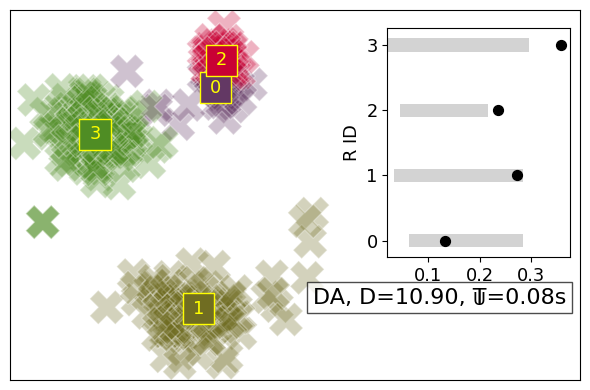

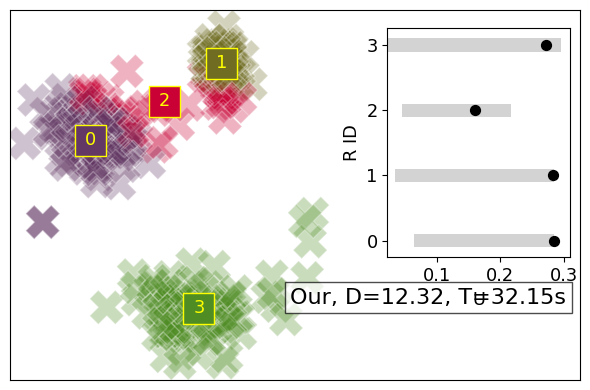

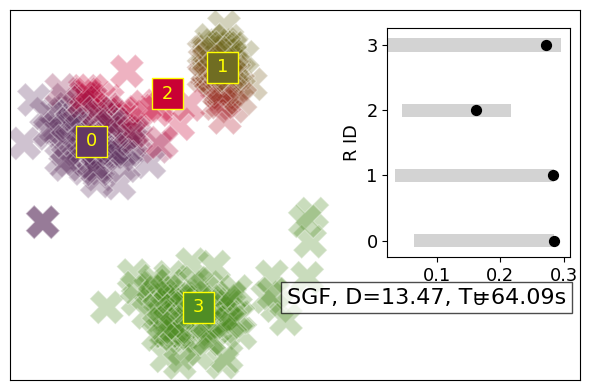

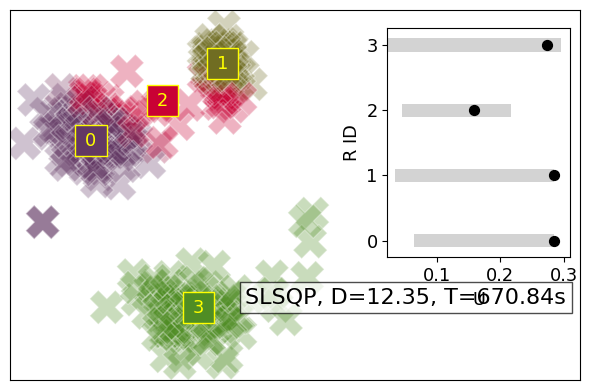

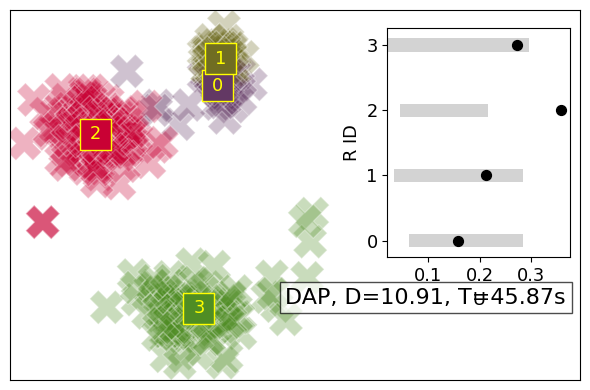

In [3]:
sol_id = 2

dir = 'compare_annealing_data/'
for approach, sol_instances in data.items():
    M_name = sol_instances[sol_id]['M_name']
    N = sol_instances[sol_id]['n_resources']
    M = sol_instances[sol_id]['n_facilities']
    image_filename = f'{M_name}_N{N}_M{M}_instant{sol_id}'
    saveFig_opts = {
        'savefig':True,
        'instant_id':sol_id,
        'filename':dir + image_filename + '.png'
    }
    class_flp.plot_flp_sol_instances(
        sol_instances[sol_id:sol_id+1],
        fontSize = 16,
        figSize = (6,4),
        savefig_opts = saveFig_opts,
        plotResTraj = False
    )


In [5]:

# Put all approaches into one dict of name → list of solutions
all_approaches = data

# Collect results by approach and (M,N)
data = defaultdict(dict)
pairs = set()

for approach, sol_instances in all_approaches.items():
    for sol in sol_instances:
        M, N = sol['n_facilities'], sol['n_resources']
        final_cost = sol['F_arr'][-1]
        runtime = sol['runtime']

        data[approach][(M, N)] = (final_cost, runtime)
        pairs.add((M, N))

# Sort (M,N) pairs for consistent column order
pairs = sorted(pairs)

# === Build LaTeX tabular header ===
header = rf"$(M,N) \rightarrow$" + " & " + " & ".join(
    [f"\\multicolumn{{2}}{{c|}}{{({M}, {N})}}" for (M, N) in pairs]
) + " \\\\"

subheader = "Method $\downarrow$ " + " & " + " & ".join(
    ["D & T (s)" for _ in pairs]
) + " \\\\"

hline = "\\hline"

# === Table rows ===
rows = []
for approach, results in data.items():
    row = [approach]
    for (M, N) in pairs:
        if (M, N) in results:
            cost, runtime = results[(M, N)]
            row.append(f"{cost:.1f} & {runtime:.1f}")
        else:
            row.append("- & -")
    rows.append(" & ".join(row) + " \\\\")

# # === Table rows with bold minima ===

# # Precompute minima for each (M,N) pair
# min_costs = {}
# min_times = {}

# for (M, N) in pairs:
#     costs = []
#     times = []
#     for approach, results in data.items():
#         if (M, N) in results:
#             cost, runtime = results[(M, N)]
#             costs.append(cost)
#             times.append(runtime)
#     if costs: 
#         min_costs[(M, N)] = min(costs)
#     if times: 
#         min_times[(M, N)] = min(times)

# # Build rows
# rows = []
# for approach, results in data.items():
#     row = [approach]
#     for (M, N) in pairs:
#         if (M, N) in results:
#             cost, runtime = results[(M, N)]

#             # Bold if matches minima
#             cost_str = f"\\textbf{{{cost:.2f}}}" if cost == min_costs[(M, N)] else f"{cost:.2f}"
#             time_str = f"\\textbf{{{runtime:.2f}}}" if runtime == min_times[(M, N)] else f"{runtime:.2f}"

#             row.append(f"{cost_str} & {time_str}")
#         else:
#             row.append("- & -")
#     rows.append(" & ".join(row) + " \\\\")


# Column format: one left col, then each (M,N) block as |cc|
col_format = "|l|" + "|".join(["cc" for _ in pairs]) + "|"

latex_table = "\\begin{tabular}{" + col_format + "}\n"
latex_table += hline + "\n"
latex_table += header + "\n"
latex_table += hline + "\n"
latex_table += subheader + "\n"
latex_table += hline + "\n"
latex_table += "\n".join(rows) + "\n"
latex_table += hline + "\n"
latex_table += "\\end{tabular}"

print(latex_table)


\begin{tabular}{|l|cc|cc|cc|cc|}
\hline
$(M,N) \rightarrow$ & \multicolumn{2}{c|}{(3, 150)} & \multicolumn{2}{c|}{(3, 240)} & \multicolumn{2}{c|}{(4, 330)} & \multicolumn{2}{c|}{(5, 420)} \\
\hline
Method $\downarrow$  & D & T (s) & D & T (s) & D & T (s) & D & T (s) \\
\hline
DA & 13.2 & 0.0 & 15.6 & 0.0 & 10.9 & 0.1 & 7.4 & 0.1 \\
CBF & 16.8 & 12.5 & 22.9 & 14.7 & 12.3 & 32.2 & 22.0 & 33.1 \\
SGF & 15.7 & 7.2 & 26.2 & 15.2 & 13.5 & 64.1 & 14.3 & 143.6 \\
SLSQP & 14.4 & 23.2 & 25.9 & 93.2 & 12.4 & 670.8 & 11.6 & 5303.1 \\
DAC & 13.2 & 30.6 & 15.6 & 37.4 & 10.9 & 45.9 & 7.4 & 67.7 \\
\hline
\end{tabular}


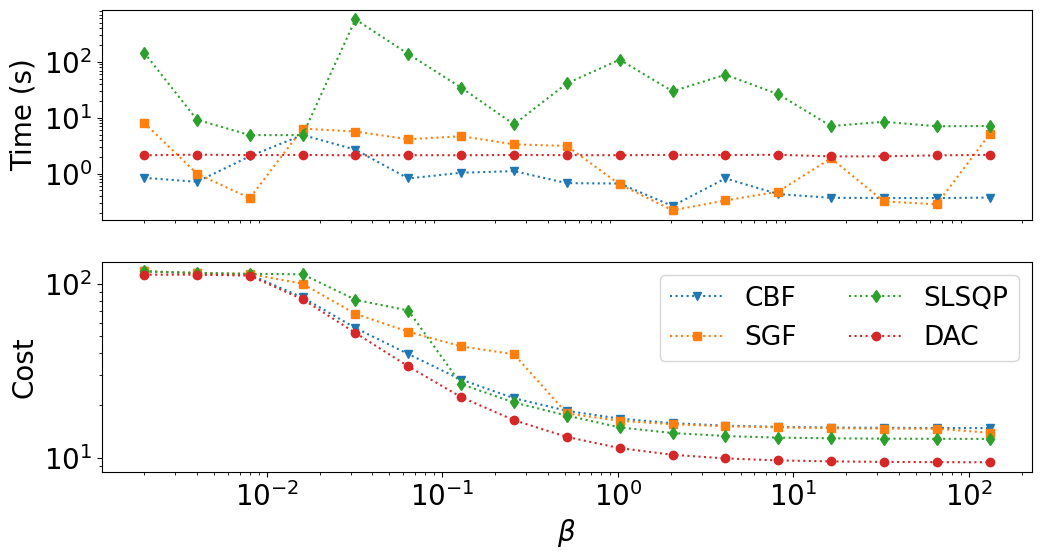

In [7]:
plt.figure(figsize=(12,6))
data_markers = {
    # "DA": DA_sol_instances,
    "CBF": 'v',
    "SGF": 's',
    "SLSQP": 'd',
    "DAC": 'o',
}

fontsize1=20
n_instances = len(data)

for approach, sol_instances in data.items():
    for i, sol in enumerate(sol_instances):
        # M, N = sol['n_facilities'], sol['n_resources']
        # final_cost = sol['F_arr'][-1]
        if i == 0:
            b_arr = sol['b_arr']
            runtime = np.array(sol['t_compute_arr'])
            cost_arr = np.array(sol['F_arr'])
        else:
            runtime = runtime + np.array(sol['t_compute_arr'])
            cost_arr = cost_arr + np.array(sol['F_arr'])
    
    runtime = runtime/n_instances
    cost_arr = cost_arr/n_instances

    if approach != 'DA':
        plt.subplot(2,1,1)
        plt.plot(b_arr, runtime, label=approach, marker=data_markers[approach], linestyle='dotted')
        plt.yscale('log')
        plt.xscale('log')
        plt.ylabel(rf'Time (s)', fontsize=fontsize1)
        plt.xticks([])
        plt.tick_params(axis='both', which='major', labelsize=fontsize1)

        plt.subplot(2,1,2)
        plt.plot(b_arr, cost_arr, label=approach, marker=data_markers[approach], linestyle='dotted')
        plt.yscale('log')
        plt.xscale('log')
        plt.ylabel(rf'Cost', fontsize=fontsize1)
        plt.xlabel(rf'$\beta$', fontsize=fontsize1)
        plt.tick_params(axis='both', which='major', labelsize=fontsize1)


plt.legend(fontsize=19, ncols=2)
filename = 'compare_annealing_data/time_cost_compare_all.png'
plt.savefig(filename, bbox_inches='tight')
plt.show()